### Exercises: perform linear regressions of salinity vs temperature and dec vs salinity.

In [1]:
# Import library and read data with pandas 
import pandas as pd
CO2Data = pd.read_csv("E:\prueba\Terminos_lagoon_TA_DIC_2023_RawData.csv")

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
C:\Users\INDIRA\AppData\Local\Temp\ipykernel_3436\1616815743.py:3: SyntaxWarning: invalid escape sequence '\p'
  CO2Data = pd.read_csv("E:\prueba\Terminos_lagoon_TA_DIC_2023_RawData.csv")


In [8]:
print(CO2Data.columns)


Index(['sample', 'date', 'estuary', 'area', 'station', 'layer_depth', 'season',
       'chlorophy_microg_l', 'cond_microsiemens_cm', 'depth_m',
       'do_percent_sat', 'do_mg_l', 'sal_psu', 'sp_cond_microsiemens_cm',
       'turbidity_fnu', 'temp_c', 'latitude', 'longitude', 'dic_micromol_kg',
       'ta_micromol_kg', 'dummy_data'],
      dtype='object')


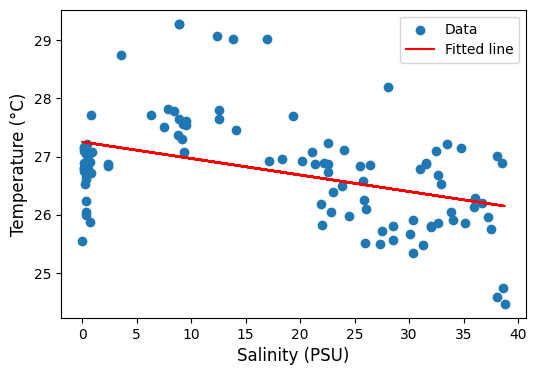


=== temp_c vs sal_psu ===
Slope: -0.0285
Intercept: 27.2520
R²: 0.1775
p-value: 6.8799e-06
                            OLS Regression Results                            
Dep. Variable:                 temp_c   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     22.44
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           6.88e-06
Time:                        22:47:12   Log-Likelihood:                -130.39
No. Observations:                 106   AIC:                             264.8
Df Residuals:                     104   BIC:                             270.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

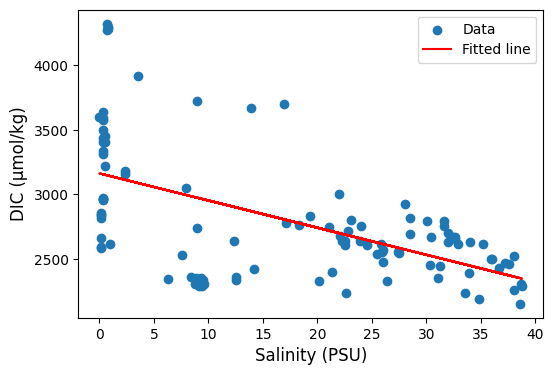


=== dic_micromol_kg vs sal_psu ===
Slope: -21.0532
Intercept: 3162.8748
R²: 0.3271
p-value: 1.5144e-10
                            OLS Regression Results                            
Dep. Variable:        dic_micromol_kg   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     50.56
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           1.51e-10
Time:                        22:47:13   Log-Likelihood:                -787.63
No. Observations:                 106   AIC:                             1579.
Df Residuals:                     104   BIC:                             1585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [16]:
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import numpy as np
import os

# === Función para regresión lineal con validación de columnas ===
def linear_regression_plot(x_col, y_col, x_label, y_label, filename, df):
    """
    Hace scatterplot + regresión lineal + imprime métricas
    """
    # Validar columnas
    if x_col not in df.columns or y_col not in df.columns:
        print(f"❌ Error: columna '{x_col}' o '{y_col}' no existe en el DataFrame.")
        print("Columnas disponibles:", df.columns.tolist())
        return

    x = df[x_col]
    y = df[y_col]

    # === Plot ===
    plt.scatter(x, y, label='Data')
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Calcular regresión lineal con scipy
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, intercept + slope * x, 'r', label='Fitted line')
    plt.legend()
    plt.gcf().set_size_inches(6, 4)

    # Guardar PDF
    output_dir = '../output_files'
    os.makedirs(output_dir, exist_ok=True)
    plt.savefig(os.path.join(output_dir, filename), dpi=300, bbox_inches='tight')
    plt.show()

    # === Resultados simples ===
    print(f"\n=== {y_col} vs {x_col} ===")
    print(f"Slope: {slope:.4f}")
    print(f"Intercept: {intercept:.4f}")
    print(f"R²: {r_value**2:.4f}")
    print(f"p-value: {p_value:.4e}")

    # === Regresión con statsmodels ===
    x_sm = sm.add_constant(x)  # agregar constante (intercepto)
    model = sm.OLS(y, x_sm).fit()
    print(model.summary())

    # Interpretación rápida
    r2 = model.rsquared
    fit_quality = (
        "✔️ Buen ajuste (explica la mayor parte de la varianza)" if r2 >= 0.7 else
        "⚠️ Ajuste moderado (explica parte de la varianza)" if r2 >= 0.4 else
        "❌ Ajuste débil (explica poca varianza)"
    )
    print(f"\nR² = {r2:.3f} → {fit_quality}")

    results = model.summary2().tables[1]
    slope_var = results.index.drop('const')[0]

    coef, pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
    print(f"Slope ({slope_var}) = {coef:.4f}, p = {pval:.4f} → "
          f"{'✔️ Significativo' if pval < 0.05 else '⚠️ No significativo'}")


# === Llamadas corregidas ===
linear_regression_plot(
    x_col='sal_psu', y_col='temp_c',
    x_label='Salinity (PSU)', y_label='Temperature (°C)',
    filename='Salinity_vs_Temperature.pdf',
    df=CO2Data
)

linear_regression_plot(
    x_col='sal_psu', y_col='dic_micromol_kg',
    x_label='Salinity (PSU)', y_label='DIC (µmol/kg)',
    filename='DIC_vs_Salinity.pdf',
    df=CO2Data
)
